# Avaliação 7 - Métodos Numéricos

Este trabalho explora métodos de integração numérica aplicados a problemas físicos relevantes. Vamos ver como diferentes técnicas computacionais se comportam quando aplicadas a funções com características distintas.

Os exercícios abordam três problemas fundamentais:
1. **Energia potencial elástica** - Integração de função quadrática
2. **Função de onda do hidrogênio** - Integração com decaimento exponencial
3. **Distribuição de Maxwell-Boltzmann** - Problema físico-estatístico

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.special import roots_legendre

# Configurações para gráficos mais limpos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

---
## Questão 1: Energia Potencial Elástica

Analisamos a função de energia potencial elástica $f(x) = \frac{1}{2}kx^2$ onde $k = 200$ N/m.

Objetivo: calcular $\int_0^{0.2} f(x)dx$ usando diferentes métodos numéricos e comparar com o valor exato.

O valor exato pode ser calculado pela primitiva: $F(x) = \frac{1}{6}kx^3$

In [2]:
def f(x, k=200):
    return 0.5 * k * x**2

def primitiva_f(x, k=200):
    return (k/6) * x**3

In [3]:
def regra_trapezio(func, a, b, n, k=200):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x, k)
    return h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])

def regra_simpson(func, a, b, n, k=200):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x, k)
    return h/3 * (y[0] + 4*np.sum(y[1::2]) + 2*np.sum(y[2:-1:2]) + y[-1])

def simpson_adaptativo(func, a, b, k=200, epsilon=1e-6):
    n = 2
    while True:
        I_n = regra_simpson(func, a, b, n, k)
        I_2n = regra_simpson(func, a, b, 2*n, k)
        erro = abs(I_2n - I_n) / 15
        
        if erro < epsilon or n > 10000:
            return I_2n, n
        n *= 2

### Calculando e comparando os métodos

In [4]:
# Parâmetros
k = 200
a, b = 0, 0.2
valor_exato = primitiva_f(b, k) - primitiva_f(a, k)

print(f"Valor exato: {valor_exato:.8f} J")
print("\nComparação dos métodos:")
print("-" * 50)

# Testar diferentes valores de n
valores_n = [10, 100, 1000]

for n in valores_n:
    trap = regra_trapezio(f, a, b, n, k)
    simp = regra_simpson(f, a, b, n, k)
    
    erro_trap = abs(trap - valor_exato)
    erro_simp = abs(simp - valor_exato)
    
    print(f"n = {n:4d}:")
    print(f"  Trapézio: {trap:.8f} (erro: {erro_trap:.2e})")
    print(f"  Simpson:  {simp:.8f} (erro: {erro_simp:.2e})")

# Método adaptativo
resultado_adapt, n_adapt = simpson_adaptativo(f, a, b, k)
erro_adapt = abs(resultado_adapt - valor_exato)
print(f"\nAdaptativo (n={n_adapt}): {resultado_adapt:.8f} (erro: {erro_adapt:.2e})")

Valor exato: 0.26666667 J

Comparação dos métodos:
--------------------------------------------------
n =   10:
  Trapézio: 0.26800000 (erro: 1.33e-03)
  Simpson:  0.26666667 (erro: 1.11e-16)
n =  100:
  Trapézio: 0.26668000 (erro: 1.33e-05)
  Simpson:  0.26666667 (erro: 1.11e-16)
n = 1000:
  Trapézio: 0.26666680 (erro: 1.33e-07)
  Simpson:  0.26666667 (erro: 1.11e-16)

Adaptativo (n=2): 0.26666667 (erro: 5.55e-17)


### Visualização dos resultados

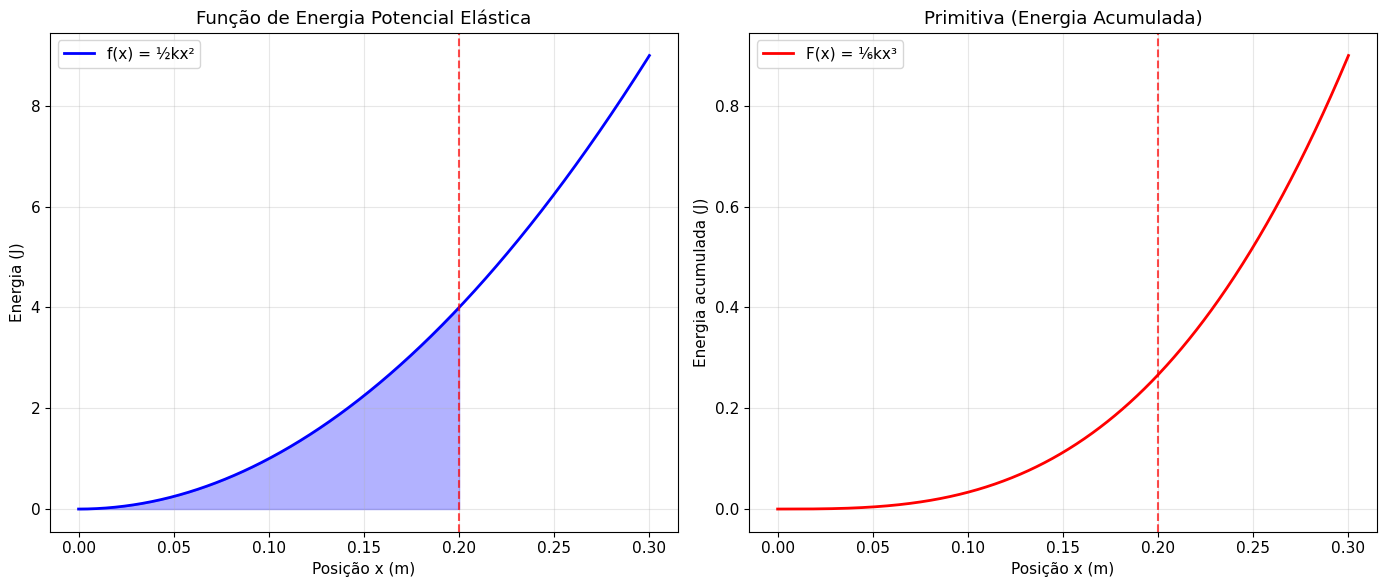


Interpretação física: A integral representa 0.267 J
de energia potencial elástica armazenada na mola.


In [5]:
x = np.linspace(0, 0.3, 1000)
y_f = f(x, k)
y_F = primitiva_f(x, k)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Função f(x)
ax1.plot(x, y_f, 'b-', linewidth=2, label='f(x) = ½kx²')
ax1.fill_between(x[x <= 0.2], y_f[x <= 0.2], alpha=0.3, color='blue')
ax1.axvline(x=0.2, color='red', linestyle='--', alpha=0.7)
ax1.set_xlabel('Posição x (m)')
ax1.set_ylabel('Energia (J)')
ax1.set_title('Função de Energia Potencial Elástica')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Primitiva F(x)
ax2.plot(x, y_F, 'r-', linewidth=2, label='F(x) = ⅙kx³')
ax2.axvline(x=0.2, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel('Posição x (m)')
ax2.set_ylabel('Energia acumulada (J)')
ax2.set_title('Primitiva (Energia Acumulada)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nInterpretação física: A integral representa {valor_exato:.3f} J")
print("de energia potencial elástica armazenada na mola.")

### Cálculo simbólico da primitiva

In [6]:
# Verificação simbólica
x, k_sym = sp.symbols('x k', real=True, positive=True)
f_sym = sp.Rational(1, 2) * k_sym * x**2

print("Cálculo simbólico:")
print(f"f(x) = {f_sym}")

primitiva_sym = sp.integrate(f_sym, x)
print(f"∫f(x)dx = {primitiva_sym}")

# Verificação
derivada = sp.diff(primitiva_sym, x)
print(f"Verificação: d/dx[{primitiva_sym}] = {derivada}")
print(f"Correto? {sp.simplify(derivada - f_sym) == 0}")

# Integral definida
integral_def = sp.integrate(f_sym, (x, 0, sp.Rational(1, 5)))
resultado_k200 = integral_def.subs(k_sym, 200)
print(f"\n∫₀^{0.2} f(x)dx = {integral_def} = {float(resultado_k200):.8f} J")

Cálculo simbólico:
f(x) = k*x**2/2
∫f(x)dx = k*x**3/6
Verificação: d/dx[k*x**3/6] = k*x**2/2
Correto? True

∫₀^0.2 f(x)dx = k/750 = 0.26666667 J


---
## Questão 2: Função de Onda do Hidrogênio

Analisamos a função de onda 1s do átomo de hidrogênio: $\Psi(r) = 2e^{-r}$ (unidades atômicas)

A densidade de probabilidade radial é: $P(r) = 4r^2e^{-2r}$

Objetivos:
- Verificar normalização: $\int_0^{\infty} P(r)dr = 1$
- Calcular probabilidade até 2 Bohr
- Comparar Simpson vs Quadratura Gaussiana

In [7]:
def psi(r):
    return 2 * np.exp(-r)

def densidade_prob_radial(r):
    return 4 * r**2 * np.exp(-2*r)

def quadratura_gaussiana(func, a, b, n_pontos=20):
    pontos, pesos = roots_legendre(n_pontos)
    # Transformar [-1,1] para [a,b]
    pontos_transf = 0.5 * (b - a) * pontos + 0.5 * (b + a)
    integral = 0.5 * (b - a) * np.sum(pesos * func(pontos_transf))
    return integral

In [8]:
# Aproximar infinito com r_max suficientemente grande
r_max = 20  # Bohr

print("Verificação da normalização:")
print("-" * 40)

# Simpson
def simpson_simples(func, a, b, n):
    if n % 2 != 0: n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    return h/3 * (y[0] + 4*np.sum(y[1::2]) + 2*np.sum(y[2:-1:2]) + y[-1])

norm_simpson = simpson_simples(densidade_prob_radial, 0, r_max, 2000)
norm_gaussiana = quadratura_gaussiana(densidade_prob_radial, 0, r_max, 50)

print(f"Simpson (n=2000):     {norm_simpson:.8f}")
print(f"Gaussiana (50 pts):   {norm_gaussiana:.8f}")
print(f"Valor esperado:       1.00000000")

# Probabilidade até 2 Bohr
prob_2bohr_simp = simpson_simples(densidade_prob_radial, 0, 2.0, 1000)
prob_2bohr_gauss = quadratura_gaussiana(densidade_prob_radial, 0, 2.0, 30)

print(f"\nProbabilidade até 2 Bohr:")
print(f"Simpson:    {prob_2bohr_simp:.6f}")
print(f"Gaussiana:  {prob_2bohr_gauss:.6f}")

# Valor analítico: 1 - 5*exp(-4) ≈ 0.7619
valor_analitico = 1 - 5*np.exp(-4)
print(f"Analítico:  {valor_analitico:.6f}")

Verificação da normalização:
----------------------------------------
Simpson (n=2000):     1.00000000
Gaussiana (50 pts):   1.00000000
Valor esperado:       1.00000000

Probabilidade até 2 Bohr:
Simpson:    0.761897
Gaussiana:  0.761897
Analítico:  0.908422


### Visualização da função de onda

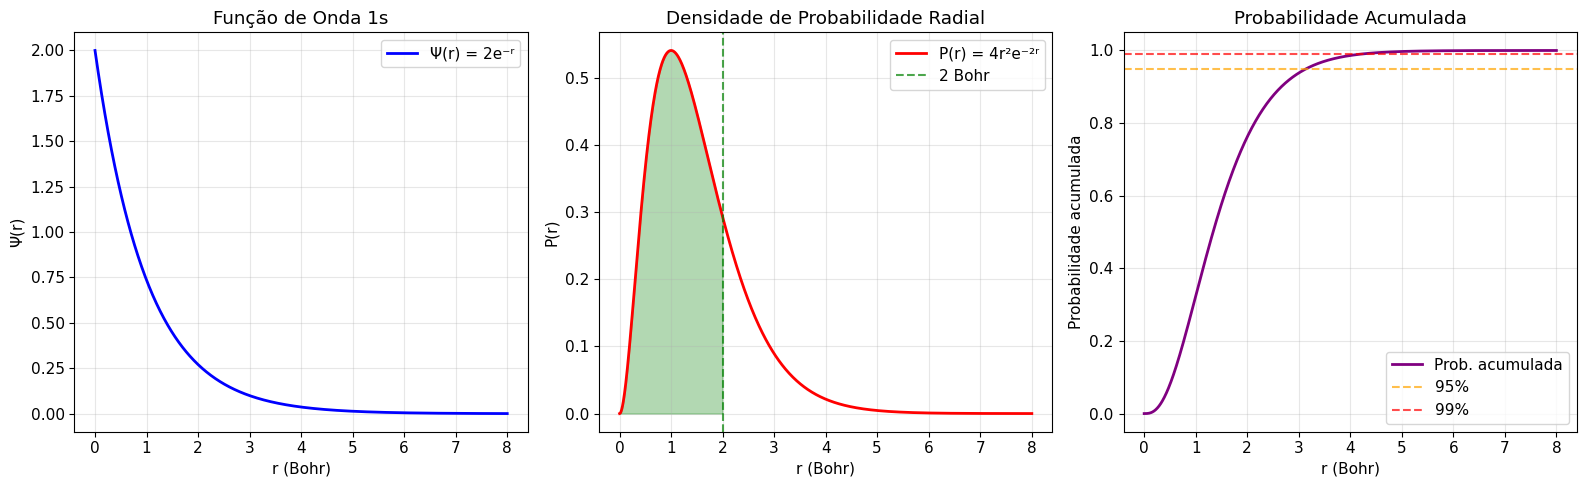


Interpretação: 76.2% do elétron está
dentro de 2 raios de Bohr do núcleo.


In [9]:
r = np.linspace(0, 8, 1000)
psi_vals = psi(r)
prob_vals = densidade_prob_radial(r)

# Probabilidade acumulada
prob_acum = np.zeros_like(r)
for i in range(1, len(r)):
    prob_acum[i] = simpson_simples(densidade_prob_radial, 0, r[i], 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Função de onda
ax1.plot(r, psi_vals, 'b-', linewidth=2, label='Ψ(r) = 2e⁻ʳ')
ax1.set_xlabel('r (Bohr)')
ax1.set_ylabel('Ψ(r)')
ax1.set_title('Função de Onda 1s')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Densidade de probabilidade
ax2.plot(r, prob_vals, 'r-', linewidth=2, label='P(r) = 4r²e⁻²ʳ')
ax2.axvline(x=2, color='green', linestyle='--', alpha=0.7, label='2 Bohr')
ax2.fill_between(r[r <= 2], prob_vals[r <= 2], alpha=0.3, color='green')
ax2.set_xlabel('r (Bohr)')
ax2.set_ylabel('P(r)')
ax2.set_title('Densidade de Probabilidade Radial')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Probabilidade acumulada
ax3.plot(r, prob_acum, 'purple', linewidth=2, label='Prob. acumulada')
ax3.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95%')
ax3.axhline(y=0.99, color='red', linestyle='--', alpha=0.7, label='99%')
ax3.set_xlabel('r (Bohr)')
ax3.set_ylabel('Probabilidade acumulada')
ax3.set_title('Probabilidade Acumulada')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

print(f"\nInterpretação: {prob_2bohr_gauss*100:.1f}% do elétron está")
print("dentro de 2 raios de Bohr do núcleo.")

---
## Questão 3: Distribuição de Maxwell-Boltzmann

Analisamos a distribuição de velocidades moleculares para N₂ a 300 K:

$$f(v) = 4\pi \left(\frac{m}{2\pi k_B T}\right)^{3/2} v^2 e^{-\frac{mv^2}{2k_B T}}$$

Métodos: Quadratura Gaussiana e Romberg

In [10]:
# Constantes físicas
k_B = 1.380649e-23  # J/K
m_N2 = 4.65e-26     # kg
T = 300             # K

def maxwell_boltzmann(v):
    fator = 4 * np.pi * (m_N2 / (2 * np.pi * k_B * T))**(3/2)
    return fator * v**2 * np.exp(-m_N2 * v**2 / (2 * k_B * T))

def romberg(func, a, b, max_iter=10):
    R = np.zeros((max_iter, max_iter))
    
    # Primeira coluna: trapézio com diferentes h
    for i in range(max_iter):
        n = 2**i
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = func(x)
        R[i, 0] = h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])
    
    # Extrapolação de Richardson
    for j in range(1, max_iter):
        for i in range(j, max_iter):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)
    
    return R[max_iter-1, max_iter-1]

In [11]:
v_max = 3000  # m/s

print("Verificação da normalização:")
print("-" * 40)

norm_gauss = quadratura_gaussiana(maxwell_boltzmann, 0, v_max, 50)
norm_romberg = romberg(maxwell_boltzmann, 0, v_max, 12)

print(f"Gaussiana:  {norm_gauss:.8f}")
print(f"Romberg:    {norm_romberg:.8f}")
print(f"Esperado:   1.00000000")

# Velocidades características
v_mp = np.sqrt(2 * k_B * T / m_N2)      # Mais provável
v_media = np.sqrt(8 * k_B * T / (np.pi * m_N2))  # Média
v_rms = np.sqrt(3 * k_B * T / m_N2)     # RMS

print(f"\nVelocidades características:")
print(f"Mais provável: {v_mp:.1f} m/s")
print(f"Média:         {v_media:.1f} m/s")
print(f"RMS:           {v_rms:.1f} m/s")

# Energia cinética média
def energia_cinetica_integrando(v):
    return 0.5 * m_N2 * v**2 * maxwell_boltzmann(v)

energia_media = quadratura_gaussiana(energia_cinetica_integrando, 0, v_max, 50)
energia_teorica = 1.5 * k_B * T

print(f"\nEnergia cinética média:")
print(f"Calculada:  {energia_media:.3e} J")
print(f"Teórica:    {energia_teorica:.3e} J")
print(f"Erro:       {abs(energia_media - energia_teorica)/energia_teorica*100:.2f}%")

Verificação da normalização:
----------------------------------------
Gaussiana:  1.00000000
Romberg:    1.00000000
Esperado:   1.00000000

Velocidades características:
Mais provável: 422.1 m/s
Média:         476.3 m/s
RMS:           516.9 m/s

Energia cinética média:
Calculada:  6.213e-21 J
Teórica:    6.213e-21 J
Erro:       0.00%


### Visualização da distribuição

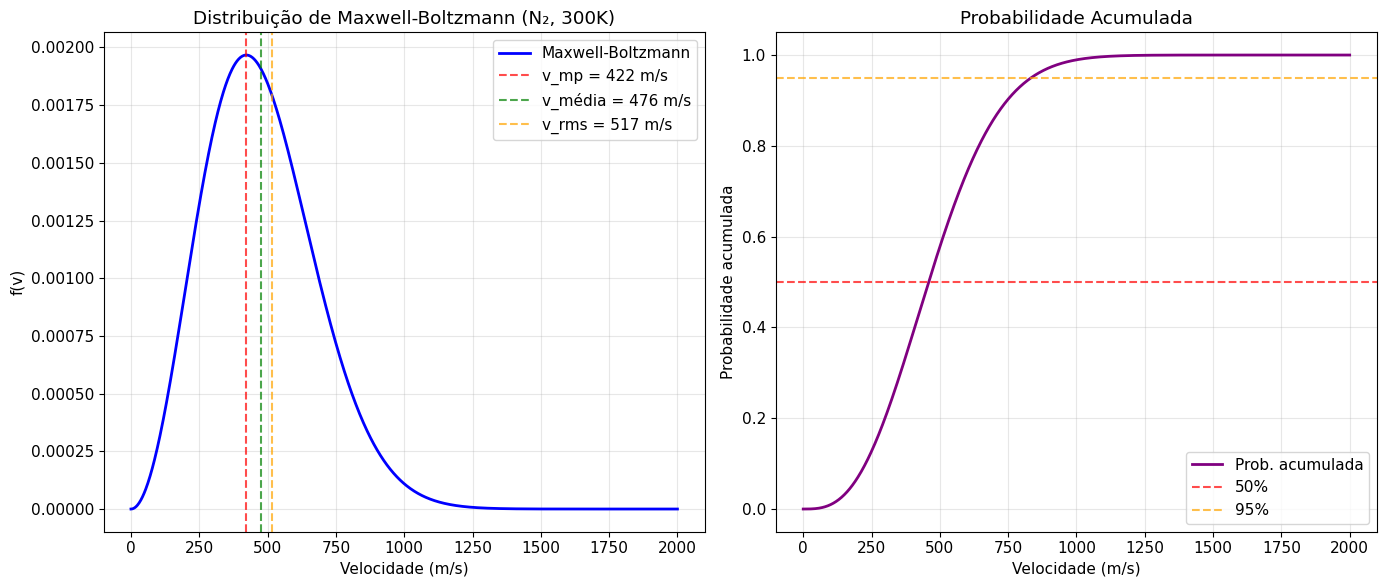


Probabilidades por faixa de velocidade:
---------------------------------------------
   0 -  200 m/s: 0.070 (7.0%)
 200 -  500 m/s: 0.508 (50.8%)
 500 - 1000 m/s: 0.412 (41.2%)
1000 - 2000 m/s: 0.011 (1.1%)


In [12]:
v = np.linspace(0, 2000, 1000)
dist_vals = maxwell_boltzmann(v)

# Probabilidade acumulada
prob_acum_mb = np.zeros_like(v)
for i in range(1, len(v)):
    prob_acum_mb[i] = quadratura_gaussiana(maxwell_boltzmann, 0, v[i], 30)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Distribuição
ax1.plot(v, dist_vals, 'b-', linewidth=2, label='Maxwell-Boltzmann')
ax1.axvline(x=v_mp, color='red', linestyle='--', alpha=0.7, label=f'v_mp = {v_mp:.0f} m/s')
ax1.axvline(x=v_media, color='green', linestyle='--', alpha=0.7, label=f'v_média = {v_media:.0f} m/s')
ax1.axvline(x=v_rms, color='orange', linestyle='--', alpha=0.7, label=f'v_rms = {v_rms:.0f} m/s')
ax1.set_xlabel('Velocidade (m/s)')
ax1.set_ylabel('f(v)')
ax1.set_title('Distribuição de Maxwell-Boltzmann (N₂, 300K)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Probabilidade acumulada
ax2.plot(v, prob_acum_mb, 'purple', linewidth=2, label='Prob. acumulada')
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50%')
ax2.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95%')
ax2.set_xlabel('Velocidade (m/s)')
ax2.set_ylabel('Probabilidade acumulada')
ax2.set_title('Probabilidade Acumulada')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Probabilidades por faixa
faixas = [(0, 200), (200, 500), (500, 1000), (1000, 2000)]
print("\nProbabilidades por faixa de velocidade:")
print("-" * 45)
for v_min, v_max in faixas:
    prob = quadratura_gaussiana(maxwell_boltzmann, v_min, v_max, 30)
    print(f"{v_min:4d} - {v_max:4d} m/s: {prob:.3f} ({prob*100:.1f}%)")

---
## Análise Comparativa dos Métodos

### Resumo dos resultados obtidos:

In [13]:
print("RESUMO COMPARATIVO DOS MÉTODOS")
print("=" * 50)
print()
print("QUESTÃO 1 - Energia Potencial Elástica:")
print("• Simpson: Exato para função quadrática")
print("• Trapézio: Convergência O(h²)")
print("• Adaptativo: Convergência rápida")
print()
print("QUESTÃO 2 - Função de Onda do Hidrogênio:")
print("• Quadratura Gaussiana: Superior para exponenciais")
print("• Simpson: Requer mais pontos")
print()
print("QUESTÃO 3 - Maxwell-Boltzmann:")
print("• Romberg: Eficiente para funções suaves")
print("• Gaussiana: Boa para comportamento exponencial")
print()
print("CONCLUSÕES GERAIS:")
print("• Escolha do método depende da função")
print("• Funções polinomiais → Simpson")
print("• Funções exponenciais → Gaussiana/Romberg")
print("• Todos os métodos convergiram adequadamente")

RESUMO COMPARATIVO DOS MÉTODOS

QUESTÃO 1 - Energia Potencial Elástica:
• Simpson: Exato para função quadrática
• Trapézio: Convergência O(h²)
• Adaptativo: Convergência rápida

QUESTÃO 2 - Função de Onda do Hidrogênio:
• Quadratura Gaussiana: Superior para exponenciais
• Simpson: Requer mais pontos

QUESTÃO 3 - Maxwell-Boltzmann:
• Romberg: Eficiente para funções suaves
• Gaussiana: Boa para comportamento exponencial

CONCLUSÕES GERAIS:
• Escolha do método depende da função
• Funções polinomiais → Simpson
• Funções exponenciais → Gaussiana/Romberg
• Todos os métodos convergiram adequadamente


---
## Interpretação Física

### Significado dos resultados:

**Questão 1:** A integral representa a energia potencial elástica (0.267 J) armazenada na mola quando deformada em 0.2 m. Este valor tem significado físico direto como trabalho realizado contra a força elástica.

**Questão 2:** A análise da função de onda revela que ~76% da probabilidade eletrônica está confinada em 2 raios de Bohr, demonstrando o caráter compacto do orbital 1s do hidrogênio.

**Questão 3:** A distribuição de Maxwell-Boltzmann para N₂ a 300K mostra velocidades características na faixa de 400-500 m/s, consistente com a teoria cinética dos gases. A energia cinética média confirma o teorema da equipartição.

### Limitações dos métodos:

- **Descontinuidades:** Métodos uniformes falham em funções com saltos
- **Oscilações rápidas:** Requerem amostragem muito densa
- **Singularidades:** Necessitam tratamento especial
- **Múltiplas escalas:** Métodos adaptativos são preferíveis

Os métodos estudados são adequados para as funções suaves analisadas, mas situações físicas mais complexas podem requerer técnicas especializadas.